In [1]:
# Imports
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


#importación de librerias
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder   #desviación estandar
from sklearn.preprocessing import MinMaxScaler     #min max

from sklearn import preprocessing

from imblearn.over_sampling import SMOTE#oversampling

import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.metrics import matthews_corrcoef


from sklearn.decomposition import PCA


import random


from scipy.spatial import distance

2022-08-25 13:17:47.074306: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-25 13:17:47.074342: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def Normalizacion_MinMax(entradas):
    sc = MinMaxScaler()
    sc.fit(entradas)
    return sc.transform(entradas)

In [3]:
# Leer Base de Datos
basededatos = pd.read_csv("./dataset/germandata.txt", sep=" ")
basededatorespaldo = basededatos
basededatos['salida'] = basededatos['salida']-1
dataset = basededatos.drop(['salida'],axis = 1)

pos = format(sum(basededatos['salida']==0))
neg = format(sum(basededatos['salida']==1))
total = neg + pos
print(neg,"   ",pos)

#preprocesamiento base de datos
salidas = basededatos['salida']
entradas = basededatos.drop(['salida'],axis = 1)
print(salidas.shape,"    ",entradas.shape)
entradas = Normalizacion_MinMax(entradas)

300     700
(1000,)      (1000, 24)


In [4]:
#separación de los datos de entrenamiento, validación y pruebas
x_train, x_test, y_train, y_test = train_test_split(entradas, salidas, test_size=0.3, stratify=salidas)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.3,stratify=y_train)


print(x_train.shape,"  ",y_train.shape)
print(x_validation.shape,"  ",y_validation.shape)
print(x_test.shape,"  ",y_test.shape)
print(entradas.shape)

(490, 24)    (490,)
(210, 24)    (210,)
(300, 24)    (300,)
(1000, 24)


In [5]:
sm = SMOTE()
print(x_train.shape,"  ",y_train.shape)
print("datos:   {}".format(sum(y_train==1)))
print("datos:   {}".format(sum(y_train==0)))

print(x_validation.shape,"  ",y_validation.shape)
print(x_test.shape,"  ",y_test.shape)
print(entradas.shape)
x_trainSMOTE, y_trainSMOTE = sm.fit_resample(x_train,y_train.ravel())
print("      ",x_trainSMOTE.shape,"  ",y_trainSMOTE.shape)
print("      ",x_validation.shape,"  ",y_validation.shape)
print("      ",x_test.shape,"  ",y_test.shape)
print("      ",entradas.shape)

(490, 24)    (490,)
datos:   147
datos:   343
(210, 24)    (210,)
(300, 24)    (300,)
(1000, 24)
       (686, 24)    (686,)
       (210, 24)    (210,)
       (300, 24)    (300,)
       (1000, 24)


## Vamos a graficar

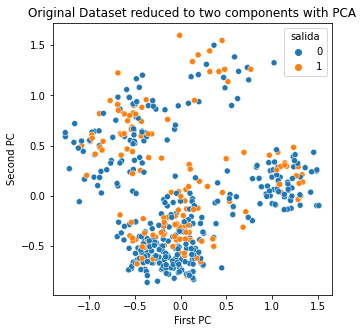

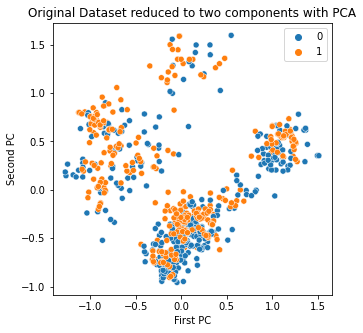

(686,)      (490,)
datos:   147
datos:   343
datosSMOTE:   343
datosSMOTE:   343


In [6]:
pca = PCA(n_components=2)

X_pca_visualization = pca.fit_transform(x_train)
y_trainres = y_train
#np.where(y_trainres==0,'good',y_trainres)
#np.where(y_trainres==1,'bad',y_trainres)

fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(x=X_pca_visualization[:, 0], y=X_pca_visualization[:, 1], hue=y_train)
ax.set_title("Original Dataset reduced to two components with PCA")
ax.set_xlabel("First PC")
ax.set_ylabel("Second PC")
plt.show()

#aqui empieza a graficar el smote
pca = PCA(n_components=2)
X_pca_visualization = pca.fit_transform(x_trainSMOTE)
y_trainresSMOTE = []
y_trainresSMOTE = y_trainSMOTE
#np.where(y_trainresSMOTE==0,'good',y_trainresSMOTE)
#np.where(y_trainresSMOTE==1,'bad',y_trainresSMOTE)


fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(x=X_pca_visualization[:, 0], y=X_pca_visualization[:, 1], hue=y_trainresSMOTE)
ax.set_title("Original Dataset reduced to two components with PCA")
ax.set_xlabel("First PC")
ax.set_ylabel("Second PC")
plt.show()
print(y_trainresSMOTE.shape,"    ", y_trainres.shape)

print("datos:   {}".format(sum(y_trainres==1)))
print("datos:   {}".format(sum(y_trainres==0)))

print("datosSMOTE:   {}".format(sum(y_trainresSMOTE==1)))
print("datosSMOTE:   {}".format(sum(y_trainresSMOTE==0)))

# función para realizar el smote

In [24]:
def VecinoCercano(aleatorio,x_train,y_train):#vamos a buscar al vecino más cercano
    menordistancia = 100000
    position_menordistancia = 0
    cont = 0
    cont1 = 0
    xik = []
    positionvecinocercano = 0
    xi = x_train[aleatorio]
    arr_menordistancia = []
    for x in x_train:
        salida = y_train.tolist()[cont]
        #print("Position:   ",salida, " contador:    ",cont)
        if salida == 1 and cont != aleatorio:
            #hallar menor dimension:
            d = distance.euclidean(xi, x)
            if d < menordistancia:
                menordistancia = d
                position_menordistancia = cont
                arr_menordistancia.append([menordistancia,cont])
            
        #xik = x_train[cont]
        
        cont = cont + 1
    return [menordistancia,position_menordistancia]
    
def FuncionSMOTE(x_train,y_train):#recibe como parametro la base desbalanceada x_train,y_train
    buenos = format(sum(y_train==0))
    malos  = format(sum(y_train==1))
    nuevos  = format(sum(y_train==2))
    aleatorio = random.randint(0, len(x_train)-1)
    #print("dimension:   ", len(x_train), "    ",aleatorio,"  ",y_train.shape)
    
    xnew = []#nuevo elemento
    xi = []#elementos seleccionado
    xik = []# vecino más cercano
    flag = True
    y_trainnew = y_train
    y_trainnew = y_trainnew.to_numpy()
    while flag:
        #generarmos un número aleatorio para verificar que sea de la clase minoritaria
        aleatorio = random.randint(0, len(y_train)-1)
        min_class = y_train.tolist()[aleatorio]
        #print(aleatorio,"  ", min_class)
        if min_class == 1:
            new = VecinoCercano(aleatorio,x_train,y_train)
            #print(y_train.tolist()[new[1]],"     ",y_train.tolist()[aleatorio])
            xnew = x_train[aleatorio] + (x_train[new[1]] - x_train[aleatorio])*random.random()
            #print("Nuevo Elemento: ",[xnew],"    ",x_train.shape)
            x_train = np.append(x_train, [xnew])
            #flag = False
            x_trainnew = [x_train[i:i+24] for i in range(0,len(x_train),24)]
            x_trainnew = np.array(x_trainnew)
            
            y_trainnew = np.append(y_trainnew,2)
            #print("Revisando:   ",type(x_train),"   ",x_train.shape," ",y_train.shape,"   ", y_trainnew.shape)
            #print(y_trainnew)
            x_train = x_trainnew
            y_train = y_trainnew
            
        buenos = format(sum(y_train==0))
        malos  = format(sum(y_train==1))
        nuevos  = format(sum(y_train==2))
        
        suma = int(malos) + int(nuevos)
        print(buenos,"   ",malos,"   ",nuevos,"     ",x_train.shape,"    ",y_train.shape,"   ",suma)
        
        if int(buenos) == suma:
            flag = False
    
    print(x_train.shape,"      ", y_trainnew.shape)
    return x_train,y_train
        
        
     


# Primero calcular la distancia eucludiana de uno de los elementos 
#print(y_train)
buenos = format(sum(y_train==0))
malos  = format(sum(y_train==1))
nuevos  = format(sum(y_train==2))
print("buenos:   ", buenos)
print("malos:    ", malos)
print("nuevos:   ", nuevos)
x_train,y_train = FuncionSMOTE(x_train,y_train)

   


buenos:    343
malos:     147
nuevos:    0
343     147     0       (490, 24)      (490,)     147
343     147     0       (490, 24)      (490,)     147
343     147     0       (490, 24)      (490,)     147
343     147     0       (490, 24)      (490,)     147
343     147     0       (490, 24)      (490,)     147
343     147     1       (491, 24)      (491,)     148
343     147     1       (491, 24)      (491,)     148
343     147     1       (491, 24)      (491,)     148
343     147     1       (491, 24)      (491,)     148
343     147     2       (492, 24)      (492,)     149
343     147     2       (492, 24)      (492,)     149
343     147     3       (493, 24)      (493,)     150
343     147     3       (493, 24)      (493,)     150
343     147     4       (494, 24)      (494,)     151
343     147     4       (494, 24)      (494,)     151
343     147     4       (494, 24)      (494,)     151
343     147     4       (494, 24)      (494,)     151
343     147     4       (494, 24)      

343     147     34       (524, 24)      (524,)     181
343     147     34       (524, 24)      (524,)     181
343     147     34       (524, 24)      (524,)     181
343     147     34       (524, 24)      (524,)     181
343     147     34       (524, 24)      (524,)     181
343     147     35       (525, 24)      (525,)     182
343     147     36       (526, 24)      (526,)     183
343     147     37       (527, 24)      (527,)     184
343     147     37       (527, 24)      (527,)     184
343     147     37       (527, 24)      (527,)     184
343     147     38       (528, 24)      (528,)     185
343     147     38       (528, 24)      (528,)     185
343     147     39       (529, 24)      (529,)     186
343     147     39       (529, 24)      (529,)     186
343     147     39       (529, 24)      (529,)     186
343     147     40       (530, 24)      (530,)     187
343     147     41       (531, 24)      (531,)     188
343     147     42       (532, 24)      (532,)     189
343     14

343     147     80       (570, 24)      (570,)     227
343     147     81       (571, 24)      (571,)     228
343     147     81       (571, 24)      (571,)     228
343     147     81       (571, 24)      (571,)     228
343     147     81       (571, 24)      (571,)     228
343     147     81       (571, 24)      (571,)     228
343     147     81       (571, 24)      (571,)     228
343     147     81       (571, 24)      (571,)     228
343     147     81       (571, 24)      (571,)     228
343     147     81       (571, 24)      (571,)     228
343     147     81       (571, 24)      (571,)     228
343     147     82       (572, 24)      (572,)     229
343     147     82       (572, 24)      (572,)     229
343     147     82       (572, 24)      (572,)     229
343     147     82       (572, 24)      (572,)     229
343     147     83       (573, 24)      (573,)     230
343     147     84       (574, 24)      (574,)     231
343     147     84       (574, 24)      (574,)     231
343     14

343     147     117       (607, 24)      (607,)     264
343     147     117       (607, 24)      (607,)     264
343     147     117       (607, 24)      (607,)     264
343     147     117       (607, 24)      (607,)     264
343     147     117       (607, 24)      (607,)     264
343     147     117       (607, 24)      (607,)     264
343     147     118       (608, 24)      (608,)     265
343     147     119       (609, 24)      (609,)     266
343     147     119       (609, 24)      (609,)     266
343     147     119       (609, 24)      (609,)     266
343     147     120       (610, 24)      (610,)     267
343     147     120       (610, 24)      (610,)     267
343     147     120       (610, 24)      (610,)     267
343     147     121       (611, 24)      (611,)     268
343     147     122       (612, 24)      (612,)     269
343     147     122       (612, 24)      (612,)     269
343     147     123       (613, 24)      (613,)     270
343     147     123       (613, 24)      (613,) 

343     147     154       (644, 24)      (644,)     301
343     147     154       (644, 24)      (644,)     301
343     147     154       (644, 24)      (644,)     301
343     147     154       (644, 24)      (644,)     301
343     147     154       (644, 24)      (644,)     301
343     147     154       (644, 24)      (644,)     301
343     147     154       (644, 24)      (644,)     301
343     147     154       (644, 24)      (644,)     301
343     147     154       (644, 24)      (644,)     301
343     147     154       (644, 24)      (644,)     301
343     147     154       (644, 24)      (644,)     301
343     147     154       (644, 24)      (644,)     301
343     147     154       (644, 24)      (644,)     301
343     147     154       (644, 24)      (644,)     301
343     147     155       (645, 24)      (645,)     302
343     147     155       (645, 24)      (645,)     302
343     147     155       (645, 24)      (645,)     302
343     147     155       (645, 24)      (645,) 

343     147     194       (684, 24)      (684,)     341
343     147     194       (684, 24)      (684,)     341
343     147     194       (684, 24)      (684,)     341
343     147     194       (684, 24)      (684,)     341
343     147     194       (684, 24)      (684,)     341
343     147     194       (684, 24)      (684,)     341
343     147     194       (684, 24)      (684,)     341
343     147     195       (685, 24)      (685,)     342
343     147     195       (685, 24)      (685,)     342
343     147     195       (685, 24)      (685,)     342
343     147     195       (685, 24)      (685,)     342
343     147     196       (686, 24)      (686,)     343
(686, 24)        (686,)


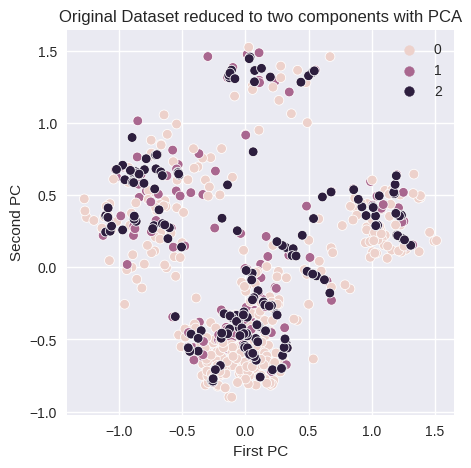

In [27]:

#aqui empieza a graficar el smote
pca = PCA(n_components=2)
X_pca_visualization = pca.fit_transform(x_train)
y_trainresSMOTE = []
y_trainresSMOTE = y_trainSMOTE
#np.where(y_trainresSMOTE==0,'good',y_trainresSMOTE)
#np.where(y_trainresSMOTE==1,'bad',y_trainresSMOTE)

mpl.style.use('seaborn')
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(x=X_pca_visualization[:, 0], y=X_pca_visualization[:, 1], hue=y_train)
ax.set_title("Original Dataset reduced to two components with PCA")
ax.set_xlabel("First PC")
ax.set_ylabel("Second PC")
plt.show()